# Scenario I

## Simulate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error

In [ ]:
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

In [ ]:
#Single or multiple server queue simulation
l = 8 # average number of arrivals per minute
u = 10 # average number of people served per minute
ncust =10000# number of customers
c=1 # number of servers
#empty dictionary for computing the utilization with each configuration of servers
utilization={}

In [ ]:
#generating inter arrival times using exponential distribution
num_events = np.random.poisson(l * ncust)
event_times = np.sort(np.random.uniform(0, ncust, num_events))
inter_arrival_times = np.diff(event_times)

# Generate random service times for each customer
service_times = list(np.random.exponential(scale=1/u,size=ncust))

In [ ]:
arrival_times= []# list of arrival times of a person joining the queue
#service_times = [] # list of service times once they reach the front
finish_times = [] # list of finish times after waiting and being served

arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]

arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)

In [ ]:
print(arrival_times[0], service_times[0])
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)

 # Total time spent in the system by each customer
system_times =[abs(round((finish_times[i] - arrival_times[i]),4)) for i in range(ncust)]

    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((system_times[i] - service_times[i]),4)) for i in range(ncust)]


0.0797 0.013648601181529938


## Waiting

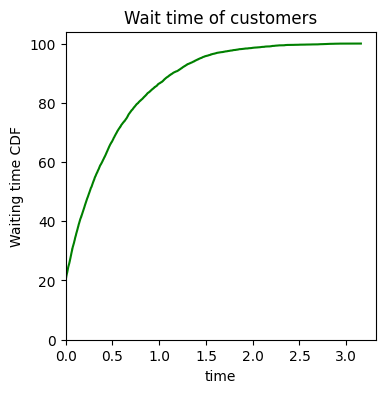

In [ ]:
sorted_wait_time = np.sort(wait_times)

acc = []
diff_waiting_time = []
tmp = 0
counter = 0
max_counter = 0
len_size = 0
time = 1 - np.exp(-1*2/(l+u-2))
time = 0.0001
for i in range(ncust):
  if sorted_wait_time[i] <= tmp:
    counter = counter+1
  else:
    while tmp < sorted_wait_time[i]:
      len_size = len_size + 1
      acc.append(counter)
      diff_waiting_time.append(tmp)
      tmp = tmp + time
      counter = 0
    counter = counter+1

simulation_waiting_time_cdf = np.cumsum(acc)/ncust *100

plt.figure(figsize=(4,4))
plt.plot(diff_waiting_time, simulation_waiting_time_cdf, 'g')
plt.xlabel('time')
plt.ylabel('Waiting time CDF')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('Wait time of customers')
plt.show()

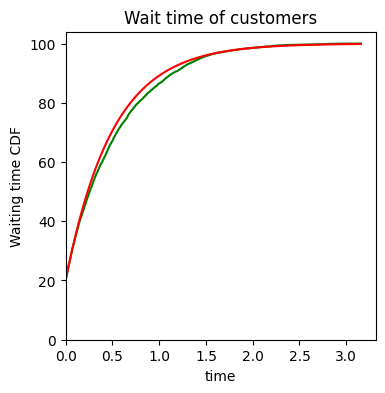

In [ ]:
theoretical_waiting_times_cdf = []
for time in diff_waiting_time:
  y =  1-l/u*np.exp(-1*time*(u-l))
  theoretical_waiting_times_cdf.append(y*100)

plt.figure(figsize=(4,4))
plt.plot(diff_waiting_time, simulation_waiting_time_cdf, 'g')
plt.plot(diff_waiting_time, theoretical_waiting_times_cdf, 'r')
plt.xlabel('time')
plt.ylabel('Waiting time CDF')
plt.title('Wait time of customers')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

In [ ]:
waiting_MSE = mean_squared_error(simulation_waiting_time_cdf, theoretical_waiting_times_cdf)
waiting_MSE

2.735747272869032

## Service

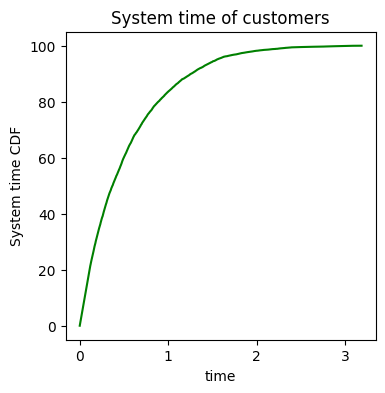

In [ ]:
sorted_system_times = np.sort(system_times)

acc = []
diff_system_times = [0]
tmp = 0
counter = 0
len_size = 0
time = 1 - np.exp(-1*2/(l+u-2))
time = 0.001
for i in range(ncust):
  if sorted_system_times[i] <= tmp:
    counter = counter+1
  else:
    while tmp < sorted_wait_time[i]:
      tmp = tmp + time
      len_size = len_size + 1
      diff_system_times.append(sorted_system_times[i])
      acc.append(counter)
      counter = 0
    counter = counter+1

simulation_system_times_cdf = np.cumsum(acc)/ncust *100
simulation_system_times_cdf = np.insert(simulation_system_times_cdf,0,[0])
plt.figure(figsize=(4,4))
plt.plot(diff_system_times, simulation_system_times_cdf,'g')
plt.xlabel('time')
plt.ylabel('System time CDF')
plt.title('System time of customers')
plt.show()

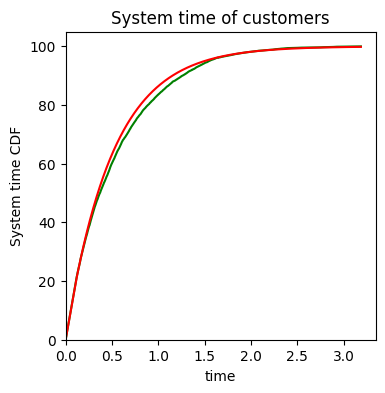

2.638673584773223

In [ ]:
theoretical_system_times_cdf = []
for time in diff_system_times:
  y =  1-np.exp(-1*time*(u-l))
  theoretical_system_times_cdf.append(y*100)


plt.figure(figsize=(4,4))
plt.plot(diff_system_times, simulation_system_times_cdf, 'g')
plt.plot(diff_system_times, theoretical_system_times_cdf, 'r')
plt.xlabel('time')
plt.ylabel('System time CDF')
plt.title('System time of customers')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

service_MSE = mean_squared_error(simulation_system_times_cdf, theoretical_system_times_cdf)
service_MSE

In [ ]:
service_MSE = mean_squared_error(simulation_system_times_cdf, theoretical_system_times_cdf)
service_MSE

2.638673584773223

## Result

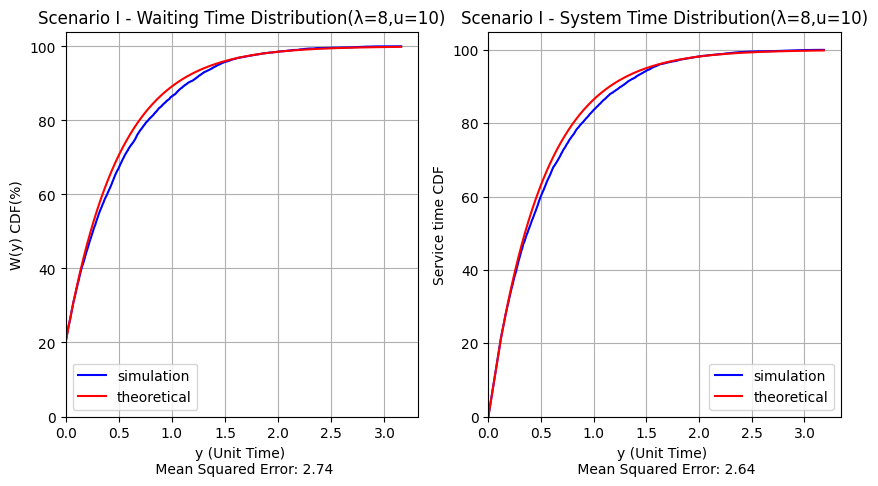

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(diff_waiting_time, simulation_waiting_time_cdf, 'b', label='simulation')
ax[0].plot(diff_waiting_time, theoretical_waiting_times_cdf, 'r', label='theoretical')
ax[0].set_xlabel('y (Unit Time) \n Mean Squared Error: '+str(format(waiting_MSE, '.2f')))
ax[0].set_ylabel('W(y) CDF(%)')
ax[0].set_title('Scenario I - Waiting Time Distribution(λ='+str(l)+',u='+str(u)+')')
ax[0].grid(visible=True)
ax[0].legend()
ax[0].set_xlim(xmin=0)
ax[0].set_ylim(ymin=0)

ax[1].plot(diff_system_times, simulation_system_times_cdf, 'b', label='simulation')
ax[1].plot(diff_system_times, theoretical_system_times_cdf, 'r', label='theoretical')
ax[1].set_xlabel('y (Unit Time) \n Mean Squared Error: '+str(format(service_MSE, '.2f')))
ax[1].set_ylabel('Service time CDF')
ax[1].set_title('Scenario I - System Time Distribution(λ='+str(l)+',u='+str(u)+')')
ax[1].grid(visible=True)
ax[1].legend()
ax[1].set_xlim(xmin=0)
ax[1].set_ylim(ymin=0)

plt.show()

# Scenario II

### Case I

In [ ]:
##single server

#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

In [ ]:
#Single server, single queue simulation
l = 10 # average number of arrivals per minute
u1 = l # average number of people served per minute
u2 = l * 2 # average number of people served per minute
c = 1
ncust =10000 # number of customers
server1_prob = 0.5
server2_prob = 0.5
utilization={}

In [ ]:
#generating inter arrival times using exponential distribution
num_events = np.random.poisson(l * ncust)
event_times = np.sort(np.random.uniform(0, ncust, num_events))
inter_arrival_times = np.diff(event_times)

# Generate random service times for each customer
service_times = []
for i in range(ncust):
  x = np.random.rand()
  if x <= server1_prob:
    service_times.append(np.random.exponential(scale=1/u1))
  else:
    service_times.append(np.random.exponential(scale=1/u2))

In [ ]:
arrival_times= []# list of arrival times of a person joining the queue
finish_times = [] # list of finish times after waiting and being served

arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]

arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
  arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)

In [ ]:
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i] = round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)

 # Total time spent in the system by each customer
system_times =[abs(round((finish_times[i] - arrival_times[i]),4)) for i in range(ncust)]

    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((system_times[i] - service_times[i]),4)) for i in range(ncust)]

### Waiting

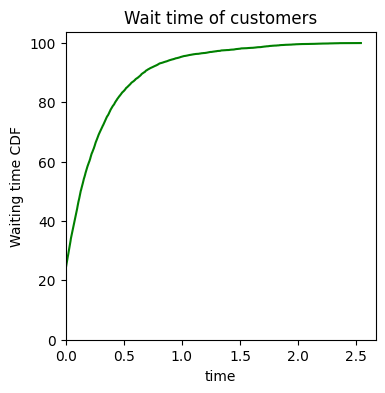

In [ ]:
sorted_wait_time = np.sort(wait_times)
acc = []
diff_waiting_time = []
tmp = 0
counter = 0
max_counter = 0
len_size = 0
time = 0.001
for i in range(ncust):
  if sorted_wait_time[i] <= tmp:
    counter = counter+1
  else:
    while tmp < sorted_wait_time[i]:
      len_size = len_size + 1
      acc.append(counter)
      diff_waiting_time.append(tmp)
      tmp = tmp + time
      counter = 0
    counter = counter+1

simulation_waiting_time_cdf = np.cumsum(acc)/ncust *100

plt.figure(figsize=(4,4))
plt.plot(diff_waiting_time, simulation_waiting_time_cdf, 'g')
plt.xlabel('time')
plt.ylabel('Waiting time CDF')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('Wait time of customers')
plt.show()

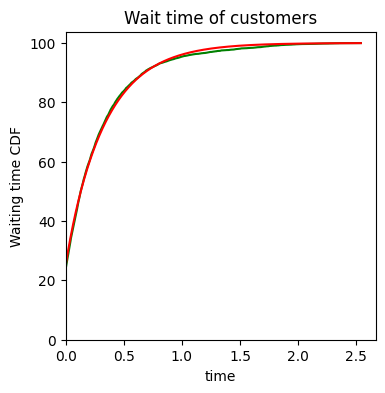

In [ ]:
theoretical_waiting_times_cdf = []
for time in diff_waiting_time:
  y = 1 - (6+4*np.sqrt(2))/16 * np.exp(-1*(2-np.sqrt(2))/2*l*time) - (6-4*np.sqrt(2))/16 * np.exp(-1*(2+np.sqrt(2))/2*l*time)
  theoretical_waiting_times_cdf.append(y*100)

plt.figure(figsize=(4,4))
plt.plot(diff_waiting_time, simulation_waiting_time_cdf, 'g')
plt.plot(diff_waiting_time, theoretical_waiting_times_cdf, 'r')
plt.xlabel('time')
plt.ylabel('Waiting time CDF')
plt.title('Wait time of customers')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

In [ ]:
waiting_MSE = mean_squared_error(simulation_waiting_time_cdf, theoretical_waiting_times_cdf)
waiting_MSE

0.4804595103934654

### Service

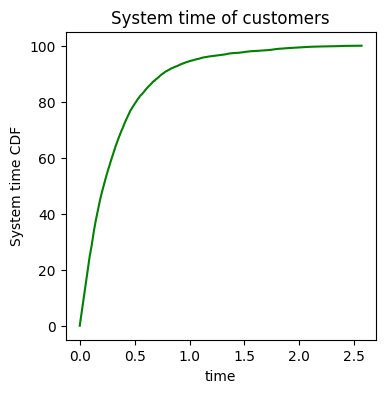

In [ ]:
sorted_system_times = np.sort(system_times)

acc = []
diff_system_times = [0]
tmp = 0
counter = 0
len_size = 0
time = 0.001
for i in range(ncust):
  if sorted_system_times[i] <= tmp:
    counter = counter+1
  else:
    while tmp < sorted_wait_time[i]:
      tmp = tmp + time
      len_size = len_size + 1
      diff_system_times.append(sorted_system_times[i])
      acc.append(counter)
      counter = 0
    counter = counter+1

simulation_system_times_cdf = np.cumsum(acc)/ncust *100
simulation_system_times_cdf = np.insert(simulation_system_times_cdf,0,[0])
plt.figure(figsize=(4,4))
plt.plot(diff_system_times, simulation_system_times_cdf,'g')
plt.xlabel('time')
plt.ylabel('System time CDF')
plt.title('System time of customers')
plt.show()

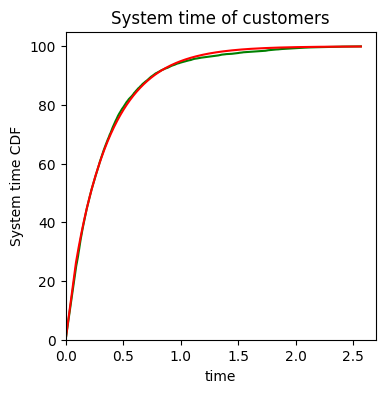

0.4598483375846445

In [ ]:
theoretical_system_times_cdf = []
for time in diff_system_times:
  y = 1 - (8+5*np.sqrt(2))/16 * np.exp(-1*(2-np.sqrt(2))/2*l*time) - (8-5*np.sqrt(2))/16 * np.exp(-1*(2+np.sqrt(2))/2*l*time)
  theoretical_system_times_cdf.append(y*100)


plt.figure(figsize=(4,4))
plt.plot(diff_system_times, simulation_system_times_cdf, 'g')
plt.plot(diff_system_times, theoretical_system_times_cdf, 'r')
plt.xlabel('time')
plt.ylabel('System time CDF')
plt.title('System time of customers')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

service_MSE = mean_squared_error(simulation_system_times_cdf, theoretical_system_times_cdf)
service_MSE

### Result

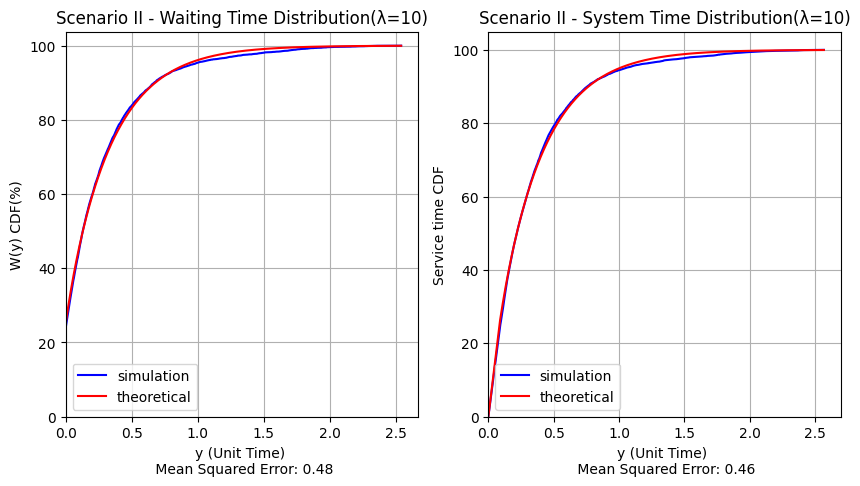

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(diff_waiting_time, simulation_waiting_time_cdf, 'b', label='simulation')
ax[0].plot(diff_waiting_time, theoretical_waiting_times_cdf, 'r', label='theoretical')
ax[0].set_xlabel('y (Unit Time) \n Mean Squared Error: '+str(format(waiting_MSE, '.2f')))
ax[0].set_ylabel('W(y) CDF(%)')
ax[0].set_title('Scenario II - Waiting Time Distribution(λ='+str(l)+')')
ax[0].grid(visible=True)
ax[0].legend()
ax[0].set_xlim(xmin=0)
ax[0].set_ylim(ymin=0)

ax[1].plot(diff_system_times, simulation_system_times_cdf, 'b', label='simulation')
ax[1].plot(diff_system_times, theoretical_system_times_cdf, 'r', label='theoretical')
ax[1].set_xlabel('y (Unit Time) \n Mean Squared Error: '+str(format(service_MSE, '.2f')))
ax[1].set_ylabel('Service time CDF')
ax[1].set_title('Scenario II - System Time Distribution(λ='+str(l)+')')
ax[1].grid(visible=True)
ax[1].legend()
ax[1].set_xlim(xmin=0)
ax[1].set_ylim(ymin=0)

plt.show()

## Case II

### Simulate

In [ ]:
##single server

#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

In [ ]:
#Single server, single queue simulation
l = 10 # average number of arrivals per minute
u1 = l # average number of people served per minute
u2 = l * 2 # average number of people served per minute
c = 1
ncust =10000 # number of customers
server1_prob = 0.25
server2_prob = 0.75
utilization={}

In [ ]:
#generating inter arrival times using exponential distribution
num_events = np.random.poisson(l * ncust)
event_times = np.sort(np.random.uniform(0, ncust, num_events))
inter_arrival_times = np.diff(event_times)

# Generate random service times for each customer
service_times = []
for i in range(ncust):
  x = np.random.rand()
  if x <= server1_prob:
    service_times.append(np.random.exponential(scale=1/u1))
  else:
    service_times.append(np.random.exponential(scale=1/u2))

In [ ]:
arrival_times= []# list of arrival times of a person joining the queue
finish_times = [] # list of finish times after waiting and being served

arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]

arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
  arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)

In [ ]:
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i] = round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)

 # Total time spent in the system by each customer
system_times =[abs(round((finish_times[i] - arrival_times[i]),4)) for i in range(ncust)]

    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((system_times[i] - service_times[i]),4)) for i in range(ncust)]

### Waiting

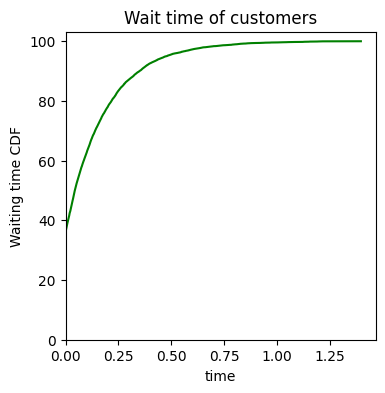

In [ ]:
sorted_wait_time = np.sort(wait_times)


acc = []
diff_waiting_time = []
tmp = 0
counter = 0
max_counter = 0
len_size = 0
time = 0.001
for i in range(ncust):
  if sorted_wait_time[i] <= tmp:
    counter = counter+1
  else:
    while tmp < sorted_wait_time[i]:
      len_size = len_size + 1
      acc.append(counter)
      diff_waiting_time.append(tmp)
      tmp = tmp + time
      counter = 0
    counter = counter+1

simulation_waiting_time_cdf = np.cumsum(acc)/ncust *100

plt.figure(figsize=(4,4))
plt.plot(diff_waiting_time, simulation_waiting_time_cdf, 'g')
plt.xlabel('time')
plt.ylabel('Waiting time CDF')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('Wait time of customers')
plt.show()

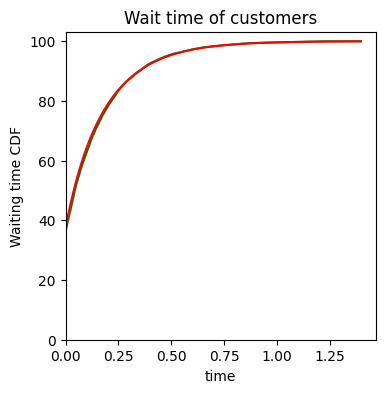

In [ ]:
busy = server1_prob + server2_prob / 2
theoretical_waiting_times_cdf = []
for time in diff_waiting_time:
  y =  (1-busy) + -1/16*np.exp(-3/2*l*time) + 1/16 + -9/16*np.exp(-1/2*l*time) + 9/16
  theoretical_waiting_times_cdf.append(y*100)

plt.figure(figsize=(4,4))
plt.plot(diff_waiting_time, simulation_waiting_time_cdf, 'g')
plt.plot(diff_waiting_time, theoretical_waiting_times_cdf, 'r')
plt.xlabel('time')
plt.ylabel('Waiting time CDF')
plt.title('Wait time of customers')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

In [ ]:
waiting_MSE = mean_squared_error(simulation_waiting_time_cdf, theoretical_waiting_times_cdf)
waiting_MSE

0.3077006498982237

### Service

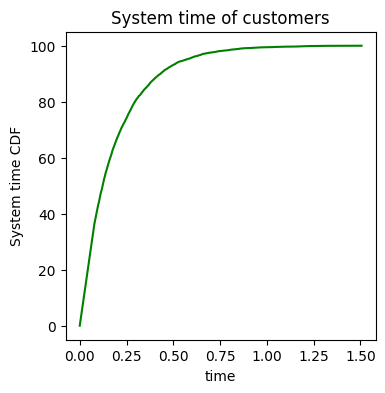

In [ ]:
sorted_system_times = np.sort(system_times)

acc = []
diff_system_times = [0]
tmp = 0
counter = 0
len_size = 0
time = 0.001
for i in range(ncust):
  if sorted_system_times[i] <= tmp:
    counter = counter+1
  else:
    while tmp < sorted_wait_time[i]:
      tmp = tmp + time
      len_size = len_size + 1
      diff_system_times.append(sorted_system_times[i])
      acc.append(counter)
      counter = 0
    counter = counter+1

simulation_system_times_cdf = np.cumsum(acc)/ncust *100
simulation_system_times_cdf = np.insert(simulation_system_times_cdf,0,[0])
plt.figure(figsize=(4,4))
plt.plot(diff_system_times, simulation_system_times_cdf,'g')
plt.xlabel('time')
plt.ylabel('System time CDF')
plt.title('System time of customers')
plt.show()

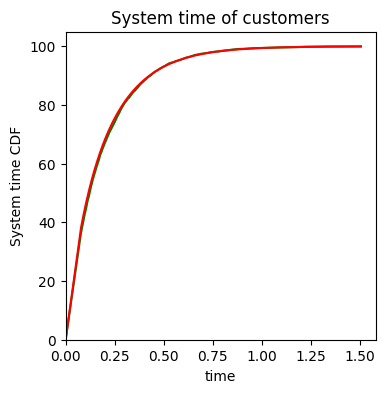

0.2948522616108651

In [ ]:
theoretical_system_times_cdf = []
for time in diff_system_times:
  y =  1- 5/32*np.exp(-3/2*l*time) - 27/32*np.exp(-1/2*l*time)
  theoretical_system_times_cdf.append(y*100)


plt.figure(figsize=(4,4))
plt.plot(diff_system_times, simulation_system_times_cdf, 'g')
plt.plot(diff_system_times, theoretical_system_times_cdf, 'r')
plt.xlabel('time')
plt.ylabel('System time CDF')
plt.title('System time of customers')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

service_MSE = mean_squared_error(simulation_system_times_cdf, theoretical_system_times_cdf)
service_MSE

### Result

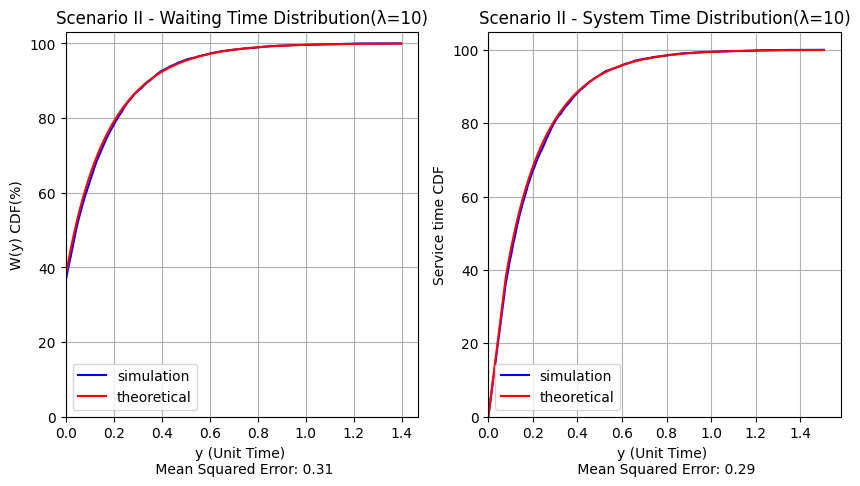

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(diff_waiting_time, simulation_waiting_time_cdf, 'b', label='simulation')
ax[0].plot(diff_waiting_time, theoretical_waiting_times_cdf, 'r', label='theoretical')
ax[0].set_xlabel('y (Unit Time) \n Mean Squared Error: '+str(format(waiting_MSE, '.2f')))
ax[0].set_ylabel('W(y) CDF(%)')
ax[0].set_title('Scenario II - Waiting Time Distribution(λ='+str(l)+')')
ax[0].grid(visible=True)
ax[0].legend()
ax[0].set_xlim(xmin=0)
ax[0].set_ylim(ymin=0)

ax[1].plot(diff_system_times, simulation_system_times_cdf, 'b', label='simulation')
ax[1].plot(diff_system_times, theoretical_system_times_cdf, 'r', label='theoretical')
ax[1].set_xlabel('y (Unit Time) \n Mean Squared Error: '+str(format(service_MSE, '.2f')))
ax[1].set_ylabel('Service time CDF')
ax[1].set_title('Scenario II - System Time Distribution(λ='+str(l)+')')
ax[1].grid(visible=True)
ax[1].legend()
ax[1].set_xlim(xmin=0)
ax[1].set_ylim(ymin=0)

plt.show()